# Problem Statement
* A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Kaggle link to the dataset: https://www.kaggle.com/datasets/sdolezel/black-friday

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading the CSV train data into a pandas dataframe

bf_train = pd.read_csv('train.csv')
bf_test = pd.read_csv('test.csv')


In [3]:
bf = bf_train.append(bf_test)

In [4]:
print(bf_train.shape)
print(bf_test.shape)
print(bf.shape)

(550068, 12)
(233599, 11)
(783667, 12)


In [5]:
# display the first 5 rows of dataframe

bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
bf.info() #information about the datafrane

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  783667 non-null  object 
 1   gender                      783667 non-null  object 
 2   age                         783667 non-null  object 
 3   occupation                  783667 non-null  int64  
 4   city_category               783667 non-null  object 
 5   stay_in_current_city_years  783667 non-null  object 
 6   marital_status              783667 non-null  int64  
 7   product_category_1          783667 non-null  int64  
 8   product_category_2          537685 non-null  float64
 9   product_category_3          237858 non-null  float64
 10  purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [7]:
def edit_column_name(col_name):
    '''this function replaces the space in a string with an underscore(_)'''
    return col_name.replace(' ','_')


In [8]:
# renaming all the columns

new_col_names = []
for column in bf.columns:
    new_col_names.append(edit_column_name(column.lower()))
    
bf.columns = new_col_names

In [9]:
#sanity

bf.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [10]:
# since, user_id is not required, let's drop it

bf.drop(labels=['user_id'], axis=1, inplace=True)

In [11]:
#sanity

bf.head()

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [25]:
bf['age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

 ranking the age groups
'''
'0-17'--1, '18-25'--2, '26-35'--3, '36-45'--4, '46-50'--5, '51-55'--6,'55+'--7 
'''


In [46]:
bf['age'] = bf['age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6,'55+':7})

In [29]:
#sanity

bf['age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [15]:
bf.isnull().sum()

product_id                         0
gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            245982
product_category_3            545809
purchase                      233599
dtype: int64

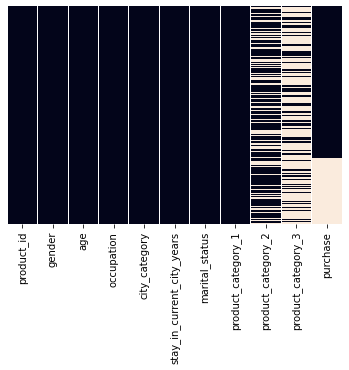

In [16]:
#this heatmap shows the visualization of the NaN values in the dataset

sns.heatmap(bf.isnull(),cbar=False,yticklabels=False)

* Observations: Looks like there are a lot of missing values in the column 'product_category_2','product_category_3'

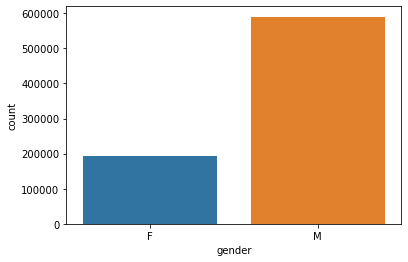

In [17]:
# shoppers by gender

sns.countplot(data=bf,x='gender')

* It is pretty clear that Men do more shopping. But, why do people say women love shopping? or, Maybe, women did shopping and their men paid it...

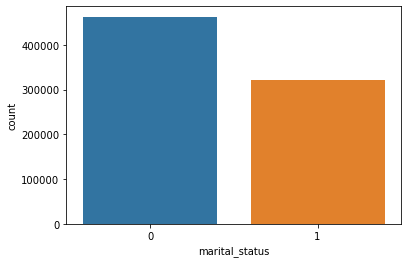

In [18]:
# shoppers by gender

sns.countplot(data=bf,x='marital_status')

In [19]:
bf['occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [20]:
bf['city_category'].value_counts()

B    329739
C    243684
A    210244
Name: city_category, dtype: int64

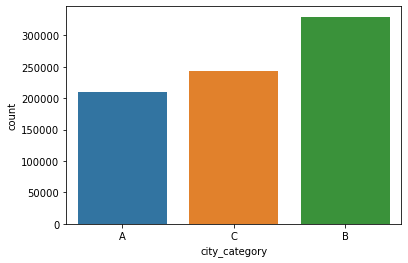

In [33]:
#countplot for city_category
sns.countplot(x=bf['city_category'])

* Observation: city_category B has more entries